# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [25]:
# Checking the number of mice.

#count the unique mouse IDs = number of mice in the study.
#rationale: different mice will have different IDs
len(df['Mouse ID'].unique())

249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mask = df[['Mouse ID','Timepoint']].duplicated()
df[~mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df[['Mouse ID','Timepoint']].duplicated()
clean_df = df[~mask]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Timepoint           1888 non-null   int64  
 2   Tumor Volume (mm3)  1888 non-null   float64
 3   Metastatic Sites    1888 non-null   int64  
 4   Drug Regimen        1888 non-null   object 
 5   Sex                 1888 non-null   object 
 6   Age_months          1888 non-null   int64  
 7   Weight (g)          1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [35]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

249

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df = clean_df.groupby(by='Drug Regimen')

#create a new dataframe for the summary stats to be stored
summary_stats_by_regimen = pd.DataFrame()

#create summary by drug regimen
summary_stats_by_regimen['Drug Regimen'] = grouped_df['Drug Regimen'].first()
summary_stats_by_regimen['mean'] = grouped_df['Tumor Volume (mm3)'].mean()
summary_stats_by_regimen['median'] = grouped_df['Tumor Volume (mm3)'].median()
summary_stats_by_regimen['stdev'] = grouped_df['Tumor Volume (mm3)'].std()
summary_stats_by_regimen['variance'] = grouped_df['Tumor Volume (mm3)'].var()
summary_stats_by_regimen['sem'] = grouped_df['Tumor Volume (mm3)'].sem()
summary_stats_by_regimen['count'] = grouped_df['Tumor Volume (mm3)'].count()

summary_stats_by_regimen




,Drug Regimen,mean,median,stdev,variance,sem,count
Drug Regimen,,,,,,,
Capomulin,Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346,230
Ceftamin,Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821,178
Infubinol,Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236,178
Ketapril,Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860,188
Naftisol,Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466,186
Placebo,Placebo,54.033581,52.288934,7.821003,61.168083,0.581331,181
Propriva,Propriva,52.393463,50.909965,6.568014,43.138803,0.525862,156
Ramicane,Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955,228
Stelasyn,Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111,181


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: title={'center': 'Count of Mouse ID/Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Count of Mouse ID/Timepoints'>

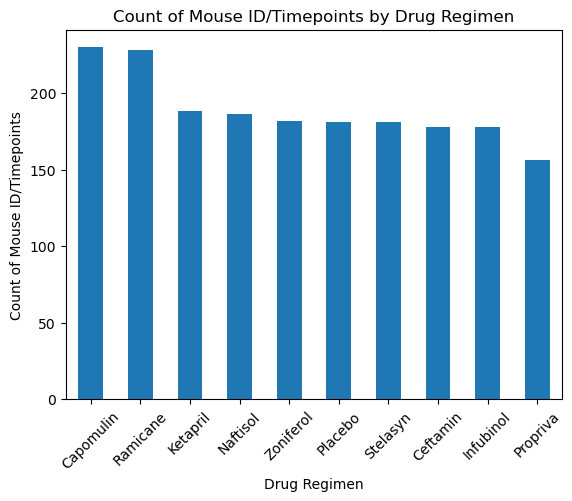

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x = 'Drug Regimen'
y = 'count'

summary_stats_by_regimen = summary_stats_by_regimen.sort_values(by='count', ascending=False)

summary_stats_by_regimen.plot(x=x
                            ,y=y
                            ,kind='bar'
                            ,title='Count of Mouse ID/Timepoints by Drug Regimen' 
                            ,xlabel=x
                            ,ylabel='Count of Mouse ID/Timepoints'
                            ,legend=False
                            ,rot=45
                            ,grid=False)


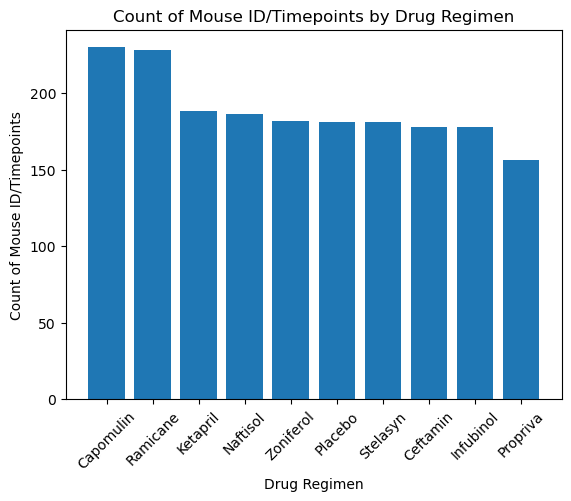

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

summary_stats_by_regimen = summary_stats_by_regimen.sort_values(by='count', ascending=False)

x = summary_stats_by_regimen['Drug Regimen']
y = summary_stats_by_regimen['count']

ax = plt.subplot()
ax.bar(x=x, height=y)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Count of Mouse ID/Timepoints')
ax.set_title('Count of Mouse ID/Timepoints by Drug Regimen')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Proportion of Male Vs Female Mice in The Study'}>

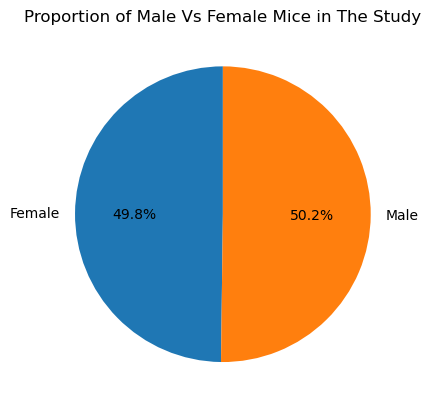

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#generate pie data: distribution of male vs female mice in study

#First goruping: Group original data by mouse ID to ensure unique mice
grouped_df = clean_df.groupby(by='Mouse ID')

pie_df = pd.DataFrame()
pie_df['Mouse ID'] = grouped_df['Mouse ID'].first()
pie_df['Sex'] = grouped_df['Sex'].first()


#second grouping: group by Sex and calculate counts of mice ID
grouped_df_2 = pie_df.groupby(by='Sex')

pie_df_2 = pd.DataFrame()
pie_df_2['Sex'] = grouped_df_2['Sex'].first()
pie_df_2['Count'] = grouped_df_2['Mouse ID'].count()


#set the output dataframe to pie_data
pie_data = pie_df_2
pie_data


#pandas pie polot
pie_data.plot(y='Count'
              ,kind='pie'
              ,autopct='%1.1f%%'
              ,legend=False
              ,xlabel=""
              ,ylabel=""
              ,title='Proportion of Male Vs Female Mice in The Study'
              ,startangle=90)

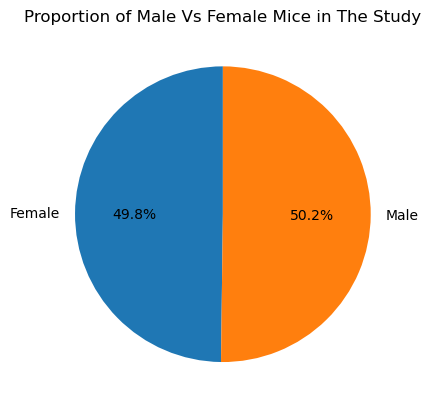

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
ax = plt.subplot()
ax.pie(x=pie_data['Count']
       ,labels=pie_data['Sex']
       ,autopct='%1.1f%%'
       ,startangle=90)
ax.set_title('Proportion of Male Vs Female Mice in The Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
